## Insurance Claim Fraud Detection

### Project Description

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

### Independent Variables

```1.	months_as_customer:``` Number of months of patronage

```2.	age:``` the length of time a customer has lived or a thing has existed

```3.	policy_number:``` It is a unique id given to the customer, to track the subscription status and other details of customer

```4.	policy_bind_date:```date which document that is given to customer after we accept your proposal for insurance

```5.	policy_state:``` This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period

```6.	policy_csl:``` is basically Combined Single Limit

```7.	policy_deductable:``` the amount of money that a customer is responsible for paying toward an insured loss

```8.	policy_annual_premium:``` This means the amount of Regular Premium payable by the Policyholder in a Policy Year

```9.	umbrella_limit:``` This means extra insurance that provides protection beyond existing limits and coverages of other policies

```10.	insured_zip:``` It is the zip code where the insurance was made

```11.	insured_sex:``` This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions

```12.	insured_education_level:``` This refers to the Level of education of the customer

```13.	insured_occupation:``` This refers Occupation of the customer

```14.	insured_hobbies:``` This refers to an activity done regularly by customer in his/her leisure time for pleasure.

```15.	insured_relationship:``` This whether customer is: single; or. married; or. in a de facto relationship (that is, living 
together but not married); or. in a civil partnership

```16.	capital-gains:``` This refers to profit accrued due to insurance premium

```17.	capital-loss:``` This refers to the losses incurred due to insurance claims

```18.	incident_date:``` This refers to the date which claims where made by customers

```19.	incident_type:``` This refers to the type of claim/vehicle damage made by customer

```20.	collision_type:``` This refers to the area of damage on the vehicle

```21.	incident_severity:``` This refers to the extent/level of damage

```22.	authorities_contacted:``` This refers to the government agencies that were contacted after damage

```23.	incident_state:``` This refers to the state at which the accident happened

```24.	incident_city:``` This refers to the city at which the accident happened

```25.	1ncident_location:``` This refers to the location at which the accident happened

```26.	incident_hour_of_the_day:``` The period of the day which accident took place

```27.	number_of_vehicles_involved:``` This refers to number of vehicles involved the accident

```28.	property_damage:``` This refers to whether property was damaged or not

```29.	bodily_injuries:``` This refers to injuries sustained

```30.	witnesses: ```This refers to the number of witnesses involved

```31.	police_report_available:``` This refers to whether the report on damage was documented or not

```32.	total_claim_amount:``` This refers to the financial implications involved in claims

```33.	injury_claim:``` This refers to physical injuries sustained

```34.	property_claim: ```This refers to property damages during incident

```35.	vehicle_claim:``` This refers to property damages during incident

```36.	auto_make: ```This refers to the make of the vehicle

```37.	auto_model:``` This refers to the model of the vehicle

```38.	auto_year: ```This refers to the year which the vehicle was manufactured

```39.	_c39:```

```40.	fraud_reported```

### Dataset Link-  
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv


### Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import pickle

### Loading dataset

In [2]:
#Reading Data From Local Machine
df = pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

### EDA(Exploratory Data Analysis)

In [4]:
#checking the shape of dataset
print("There are {} rows and {} columns respectively present in the dataset.".format(*df.shape))

There are 1000 rows and 40 columns respectively present in the dataset.


In [5]:
# checking columns in Dataset
print("These are the columns present in the dataset:  \n\n",df.columns)

These are the columns present in the dataset:  

 Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


In [6]:
# checking duplicate values in the dataset
print("There are {} duplicates present in the dataset".format(df.duplicated().sum()))

There are 0 duplicates present in the dataset


In [7]:
# checking null values in the dataset
print("There are {} Nulls present in the dataset".format(df.isnull().sum().sum()))

There are 1000 Nulls present in the dataset


In [8]:
#Checking which column have null values 
columns_with_null_values = df.columns[df.isnull().any()].tolist()
#Checking % of null values
null_percentage = df[columns_with_null_values].isnull().mean() * 100
# Creating dataframe of null values and there %
null_info = pd.DataFrame({'Column Name': columns_with_null_values, 'Null Percentage': null_percentage})

In [9]:
null_info

Column Name  Null Percentage
_c39        _c39            100.0

**in _c39 column there are all the values are null so we will delete this column**

In [10]:
df.drop('_c39',axis=1,inplace=True)

In [11]:
# Checking Unique values in columns
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('*'*50)

months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
**************************************************
capital-gains
[ 53300      0  35100  48900  66000  38400  52800  41300  55700  63600
  53500  45500  57000  46700  72700  31000  53200  27500  81100  51400
  65700  48500  49700  36400  35300  88400  47600  71500  36100  56600
  94800  36900  69100  62400  35700  43400  59600  43300  56200  37800
  78300  52700  57300    800  55200  90700  67700  61500  37300  50500
  34300  28800  52600  34400  62000  41200  44300  58000  51100  47200
  70500  40700  42400  57900  60000  65300  84900  45300  68900  46300
  76000  58600  54100  58100  13100  31900  17600  52000  29000  62500
  39600  47700  38100  71400  75400  88800  53900  27000  72200  29600
  51000  62700  25000  68500  42900  29300  45100  63100  66400  25500
  59900  62200  24000  24800  47800  53000  24400  65600  39900  40600
  33300  54000  60300  25900  47500  41500  44400  51500  52100  57800
  55400

[13020   780  3850  6340   650  6410  7150  9380  2770  4700 15820 17680
  9420  1120  8400 10520  5790  7080 13260  6040  5240  4730  5960 16360
 14160 11000   820   520 15520 14100 12600  7460  3310 14020  5400  5310
  6020  6230 10940  4000 16180  5740  5680 11280     0  6280   810  7660
  8180   660   430 12820   480  7890  6270   300  7310  5720  3690 11260
  5710  6570  6860 13800  3770   860  6210  6810  4760  4770  5690  7450
 10860  1240  7220 10160  1320  1500  1180 11080 11660 11400 11680   470
  5640 10300 17880   590 11780  8520   630  6630  7210   900   700 15860
  5280  3600   330  7790 19950 14840 14940  7000 14740  9620  9540  9320
 12800  9000  6620 13860 12760  6160 17140  9900  5760 10640  4970 14120
 12300  8500  9360  8680  6920   410  6550 12260   940  1260  5070 15280
  6400  8960 17280 15040  5340  9780 10540  9040 14420 13040   620  1680
 11700 13240 21580 18180  5580 12960   670  7960  6700  4990  7400  1220
 15920  8560 11380 13100  5110 16800 16540  7440  5

In [12]:
unnecessary_columns = [
    'policy_number',#the "policy_number" column serves only as a unique identifier for each row and doesn't provide meaningful information for our analysis or modeling
    'insured_zip',#the "insured_zip" column contains nearly unique values for each row and does not provide significant information for your analysis or modeling
    'incident_location'#the "incident_location" column serves only as a unique identifier for each row and doesn't provide meaningful information for your analysis or modeling,
]

df.drop(unnecessary_columns,axis=1,inplace=True)

```collision_type```,```property_damage```,```police_report_available``` these columns have a unique value **?** which is wrong entry so i will replace this with **np.nan**

In [13]:
# Replace the ? unique values with np.nan
df['collision_type'].replace('?', np.nan, inplace=True)
df['property_damage'].replace('?', np.nan, inplace=True)
df['police_report_available'].replace('?', np.nan, inplace=True)

```These columns are categorical column so we will fill their null values by their mode values```

In [14]:
#These columns are categorical column so we will fill their null values by their mode values
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

<AxesSubplot:>

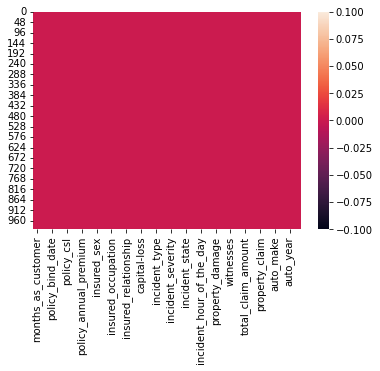

In [15]:
# Heatmap of null values
sns.heatmap(df.isnull())

Now we have filled all the null values

In [16]:
# Checking value counts 
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('*'*50)

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
**************************************************
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
**************************************************
policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
*******************************************

In [17]:
df.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   
1                 228   42       27-06-2006           IN    250/500   
2                 134   29       06-09-2000           OH    100/300   
3                 256   41       25-05-1990           IL    250/500   
4                 228   44       06-06-2014           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit insured_sex  \
0               1000                1406.91               0        MALE   
1               2000                1197.22         5000000        MALE   
2               2000                1413.14         5000000      FEMALE   
3               2000                1415.74         6000000      FEMALE   
4               1000                1583.91         6000000        MALE   

  insured_education_level  ... witnesses police_report_available  \
0                      MD  ...         2                     YES   
1                      MD  ...         0                      NO   
2                     PhD  ...         3                      NO   
3                     PhD  ...         2                      NO   
4               Associate  ...         1                      NO   

  total_claim_amount  injury_claim  property_claim vehicle_claim  auto_make  \
0              71610          6510           13020         52080       Saab   
1               5070           780             780          3510   Mercedes   
2              34650          7700            3850         23100      Dodge   
3              63400          6340            6340         50720  Chevrolet   
4               6500          1300             650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              Y  
1       E400      2007              Y  
2        RAM      2007              N  
3      Tahoe      2014              Y  
4        RSX      2009              N  

[5 rows x 36 columns]

##### Now i will do feature engineering with date columns

In [18]:
## There are 2 datetime column present in dataset
# handling the datetime values
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])
# Extracting Day, Month and Year column from policy_bind_date
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [19]:
 #Since Extraction is done now we can Drop policy_bind_date and incident_date columns
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [20]:
df.head(2)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   

  insured_occupation  ... auto_make auto_model  auto_year  fraud_reported  \
0       craft-repair  ...      Saab        92x       2004               Y   
1  machine-op-inspct  ...  Mercedes       E400       2007               Y   

  policy_bind_day policy_bind_month policy_bind_year incident_day  \
0              17                10             2014           25   
1              27                 6             2006           21   

  incident_month incident_year  
0              1          2015  
1              1          2015  

[2 rows x 40 columns]

##### Now i will handle policy_csl column because in this column  numerical data separated by '/', resulting into object datatype.we will split the column into two part CSL_accditental and CSL_overall

The "policy_csl" column in your dataset likely represents the Combined Single Limit (CSL) in an insurance policy. CSL is a type of insurance coverage that combines both bodily injury liability and property damage liability coverage into a single limit. It means that the insurance policy will pay up to a certain total amount for all covered losses, which can be applied to bodily injury claims, property damage claims, or a combination of both

In [21]:
# Spliting and extracting policy_csl at '/'
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Overall']=df.policy_csl.str.split('/',expand=True)[1]
# Now we can drop policy_csl column 
df.drop("policy_csl",axis=1,inplace=True)

In [22]:
# Saperating Numerical Discreate Contineous  And Categorical columns
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
datetime_feature = [feature for feature in df.columns if pd.api.types.is_datetime64_any_dtype(df[feature])]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))
print("Datetime Feature Count: {}".format(len(datetime_feature)))

Numerical Features Count 22
Discrete feature Count 11
Continuous feature Count 11
Categorical feature Count 19
Datetime Feature Count: 0


In [23]:
df.describe()

months_as_customer          age  policy_deductable  \
count         1000.000000  1000.000000        1000.000000   
mean           203.954000    38.948000        1136.000000   
std            115.113174     9.140287         611.864673   
min              0.000000    19.000000         500.000000   
25%            115.750000    32.000000         500.000000   
50%            199.500000    38.000000        1000.000000   
75%            276.250000    44.000000        2000.000000   
max            479.000000    64.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

       ...  injury_claim  property_claim  vehicle_claim    auto_year  \
count  ...   1000.000000     1000.000000    1000.000000  1000.000000   
mean   ...   7433.420000     7399.570000   37928.950000  2005.103000   
std    ...   4880.951853     4824.726179   18886.252893     6.015861   
min    ...      0.000000        0.000000      70.000000  1995.000000   
25%    ...   4295.000000     4445.000000   30292.500000  2000.000000   
50%    ...   6775.000000     6750.000000   42100.000000  2005.000000   
75%    ...  11305.000000    10885.000000   50822.500000  2010.000000   
max    ...  21450.000000    23670.000000   79560.000000  2015.000000   

       policy_bind_day  policy_bind_month  policy_bind_year  incident_day  \
count      1000.000000        1000.000000       1000.000000    1000.00000   
mean         15.448000           6.559000       2001.604000      13.08400   
std           8.850176           3.391758          7.360391      10.44318   
min           1.000000           1.000000       1990.000000       1.00000   
25%           8.000000           4.000000       1995.000000       2.00000   
50%          16.000000           7.000000       2002.000000      15.00000   
75%          23.000000           9.000000       2008.000000      22.00000   
max          31.000000          12.000000       2015.000000      31.00000   

       incident_month  incident_year  
count     1000.000000         1000.0  
mean         3.407000         2015.0  
std          3.276291            0.0  
min          1.000000         2015.0  
25%          1.000000         2015.0  
50%          2.000000         2015.0  
75%          5.000000         2015.0  
max         12.000000         2015.0  

[8 rows x 22 columns]

#### Important Observations from the Dataset

1. **Months as Customer:**
   - The average length of time a customer has been with the company is approximately 204 months, or about 17 years.
   - The minimum value is 0, indicating there are customers who are relatively new to the company.
   - The maximum value is 479, suggesting some customers have been with the company for a long time.

2. **Age:**
   - The average age of customers is around 39 years.
   - The minimum age is 19, indicating there are younger customers in the dataset.
   - The maximum age is 64, suggesting there are older customers as well.

3. **Policy Deductible:**
   - The policy deductible has a minimum value of 500 and a maximum value of 2000.
   - The mean deductible is approximately 1136, indicating the average deductible amount.

4. **Policy Annual Premium:**
   - The mean annual premium is approximately 1256.41.
   - The minimum premium is 433.33, while the maximum premium is 2047.59.

5. **Umbrella Limit:**
   - The umbrella limit ranges from -1,000,000 to 10,000,000.
   - The mean umbrella limit is 1,101,000.

6. **Capital Gains:**
   - Capital gains vary from 0 to 100,500, with an average of 25,126.10.
   - The majority of customers seem to have capital gains close to zero.

7. **Capital Loss:**
   - Capital losses range from -111,100 to 0, with an average loss of -26,793.70.
   - Most customers have capital losses, with only a few having zero losses.

8. **Incident Hour of the Day:**
   - Incidents occurred throughout the day, with an average incident hour around 11:38 AM.
   - The incidents appear to be evenly distributed across the 24-hour period.

9. **Number of Vehicles Involved:**
   - The number of vehicles involved in incidents ranges from 1 to 4, with an average of 1.84 vehicles involved.

10. **Bodily Injuries:**
    - The number of bodily injuries varies from 0 to 2, with an average of 0.99 injuries.

These observations provide a summary of the basic statistics for several numerical features in the dataset. Further analysis and visualization can help uncover more insights and patterns in the data.


## Taking Insigts By Visualizing The Data

### categorical_feature

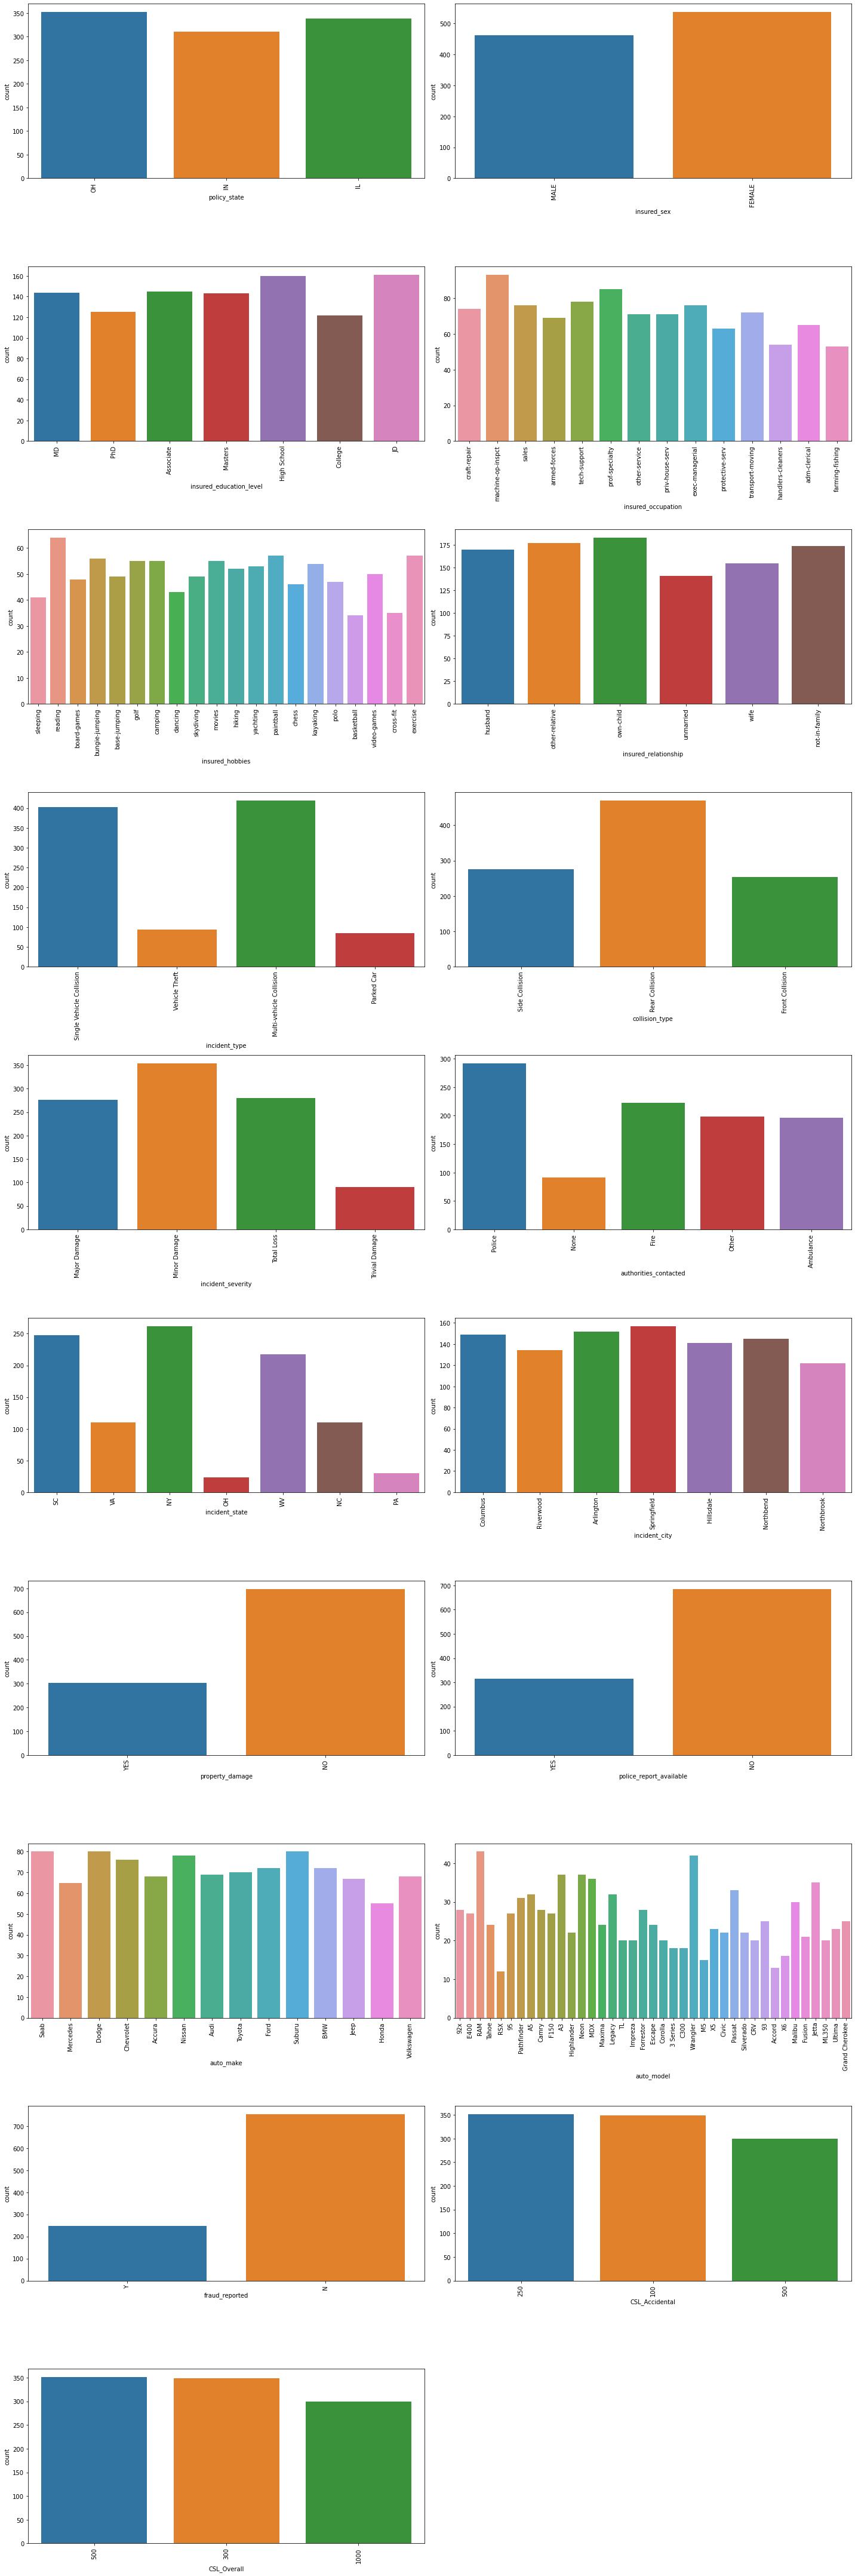

In [24]:
# Create the subplots
fig = plt.figure(figsize=(20, 60))
# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_feature):
    plt.subplot(10, 2, i + 1)
    sns.countplot(data=df, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<AxesSubplot:>

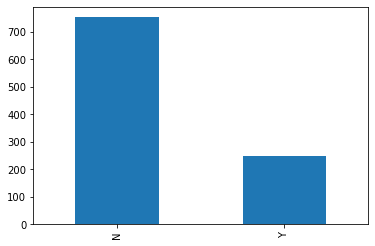

In [25]:
# checking the distribution in the target column 
df.fraud_reported.value_counts().plot(kind='bar')

Our target column is imbalanced

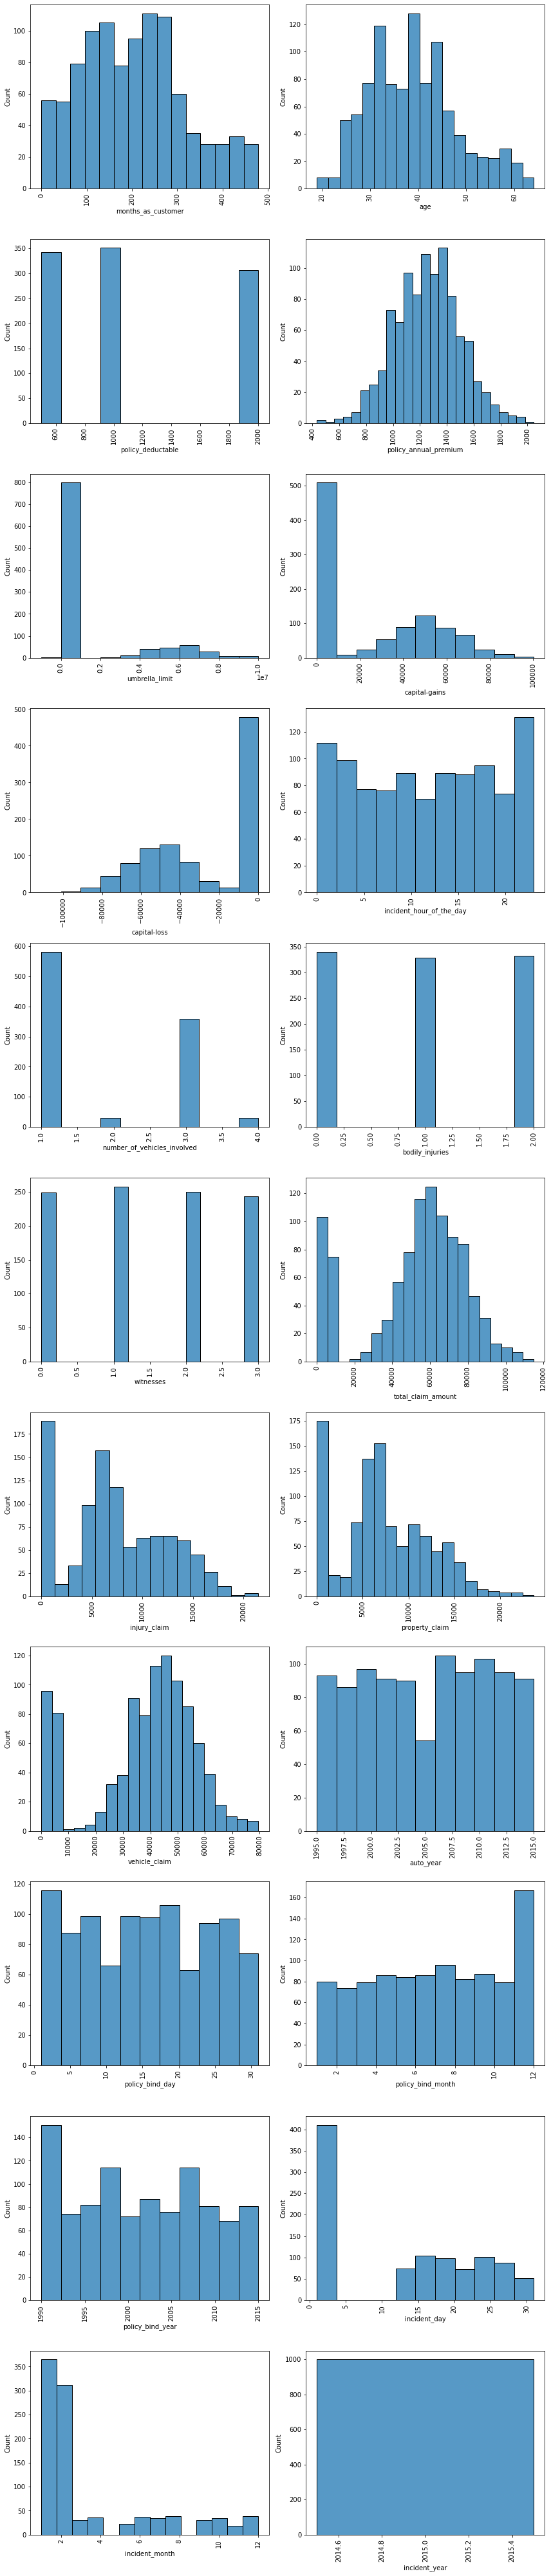

In [26]:
# Create the subplots
fig = plt.figure(figsize=(12, 60))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.histplot(data=df, x=col)
    plt.xlabel(col)
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

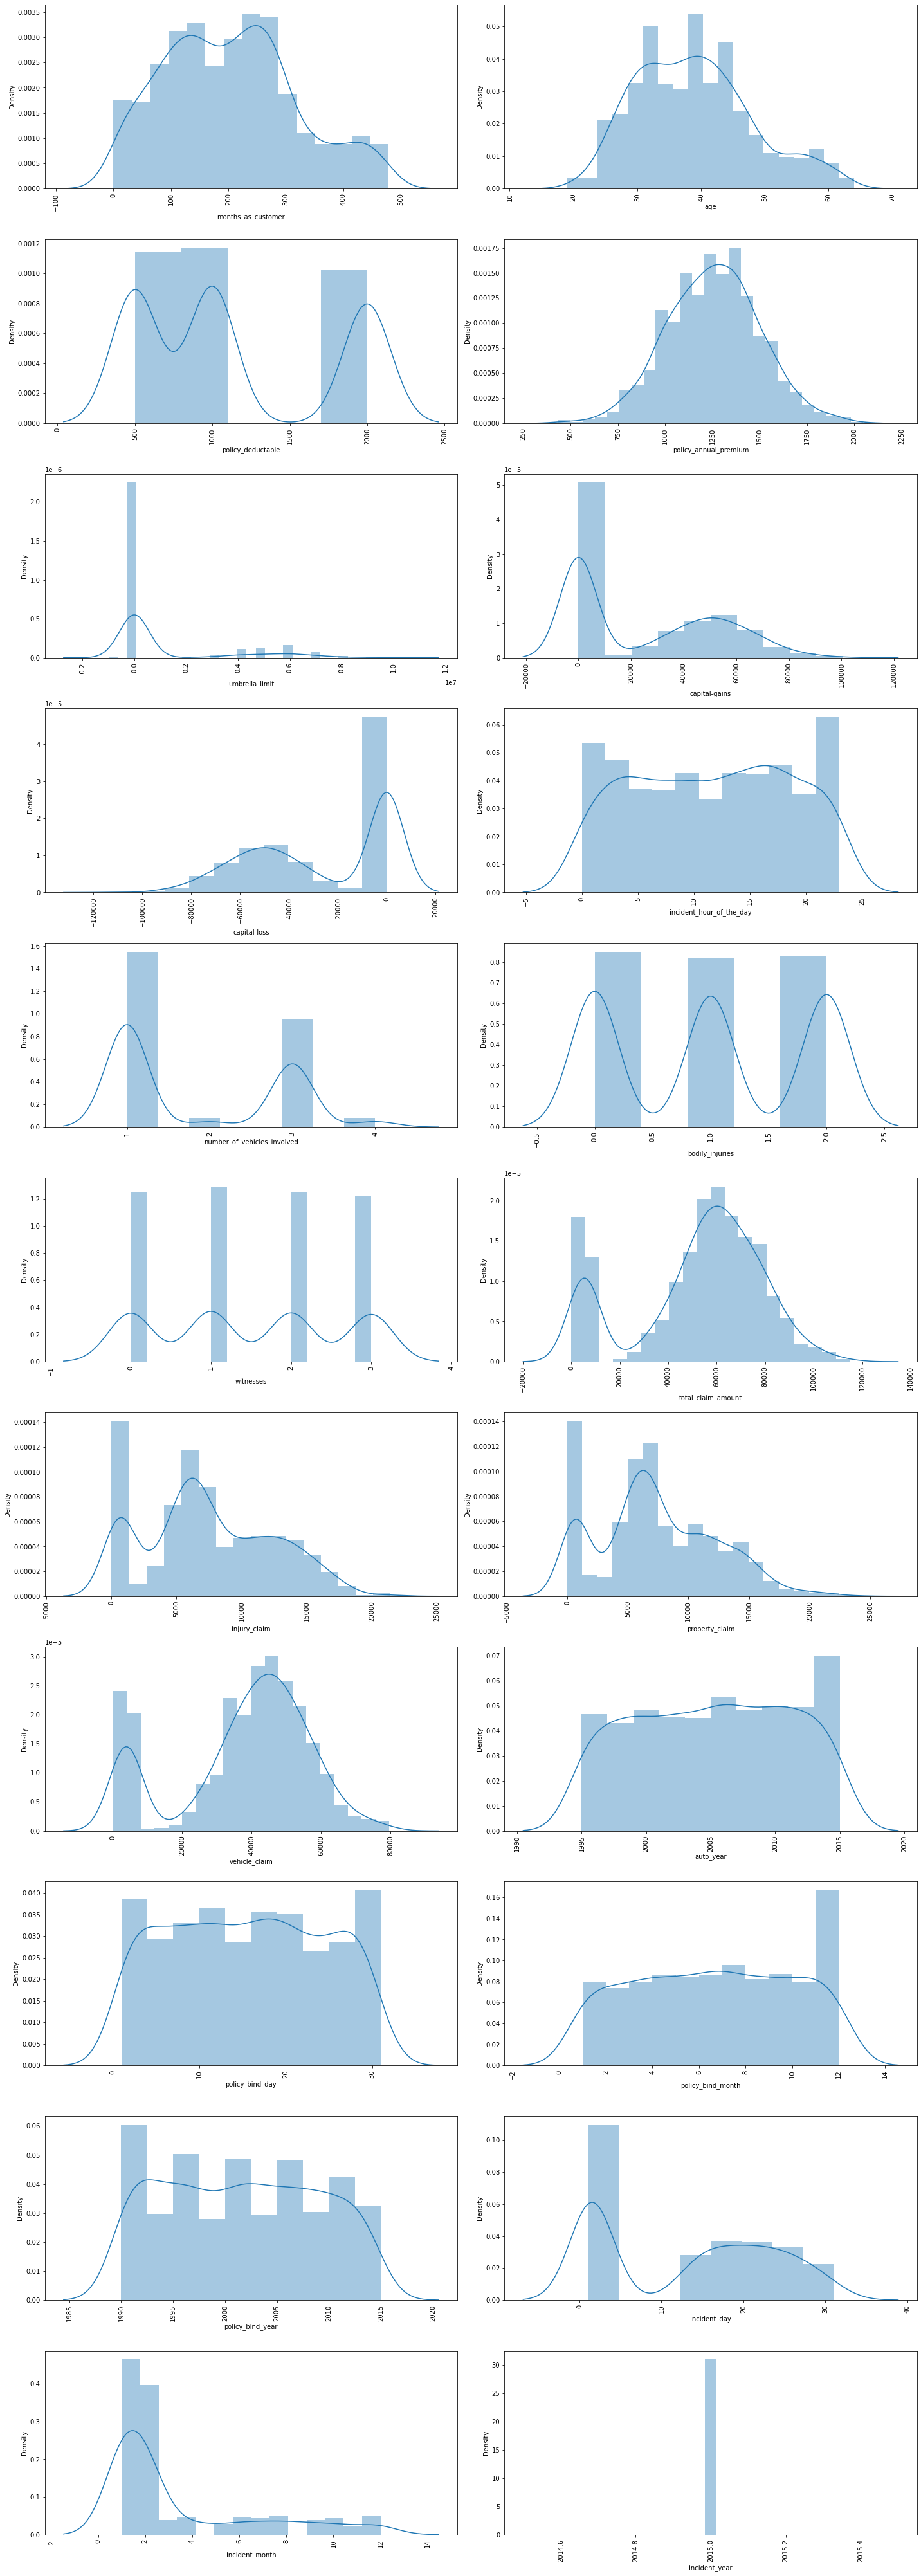

In [27]:
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Here we can see that some columns are not normally distributed

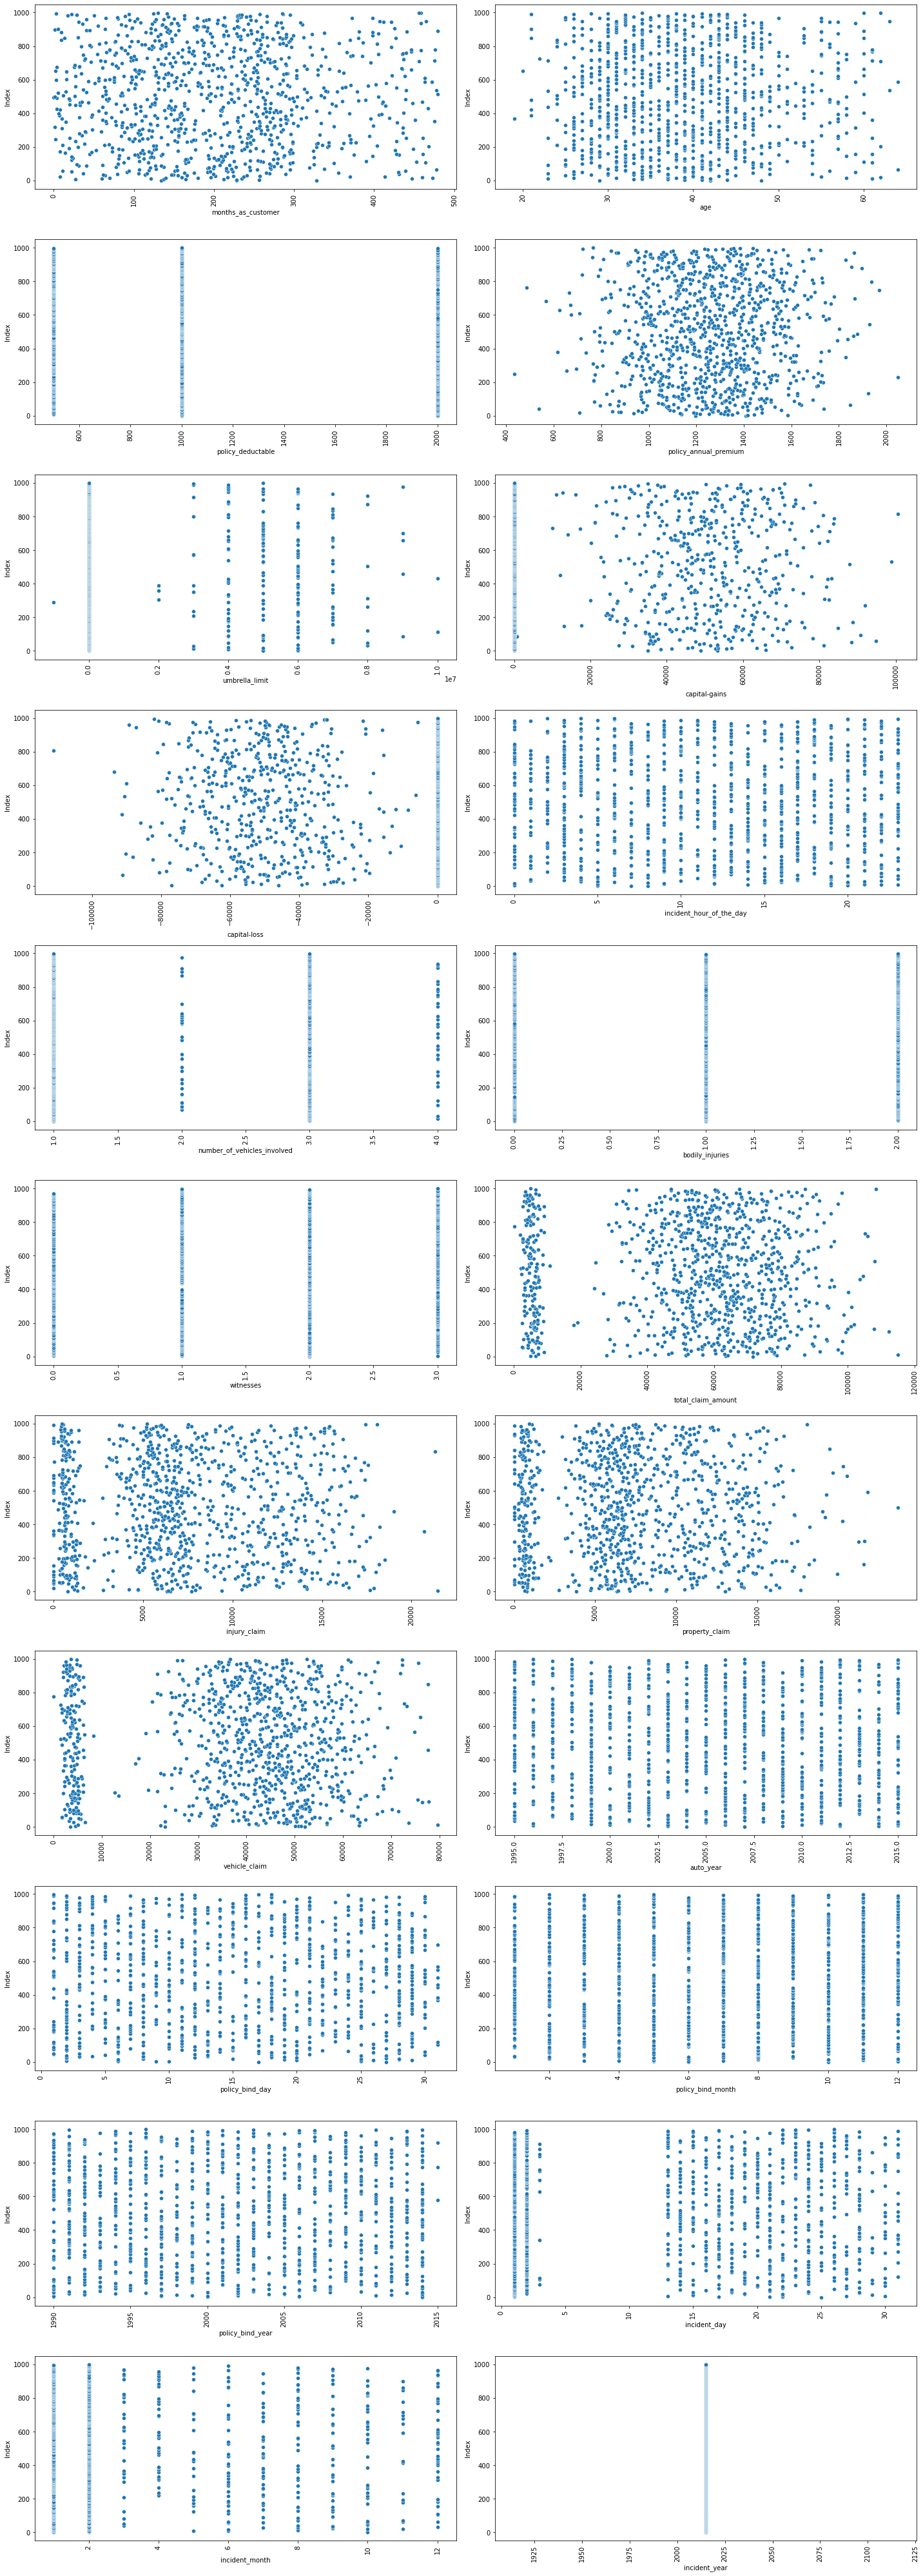

In [28]:
#we are plotting each numerical column against the index (row number) of the DataFrame
plt.figure(figsize=(20, 60))
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.scatterplot(data=df, x=col, y=df.index)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Index')

plt.tight_layout()
plt.show()




## bivariate analysis

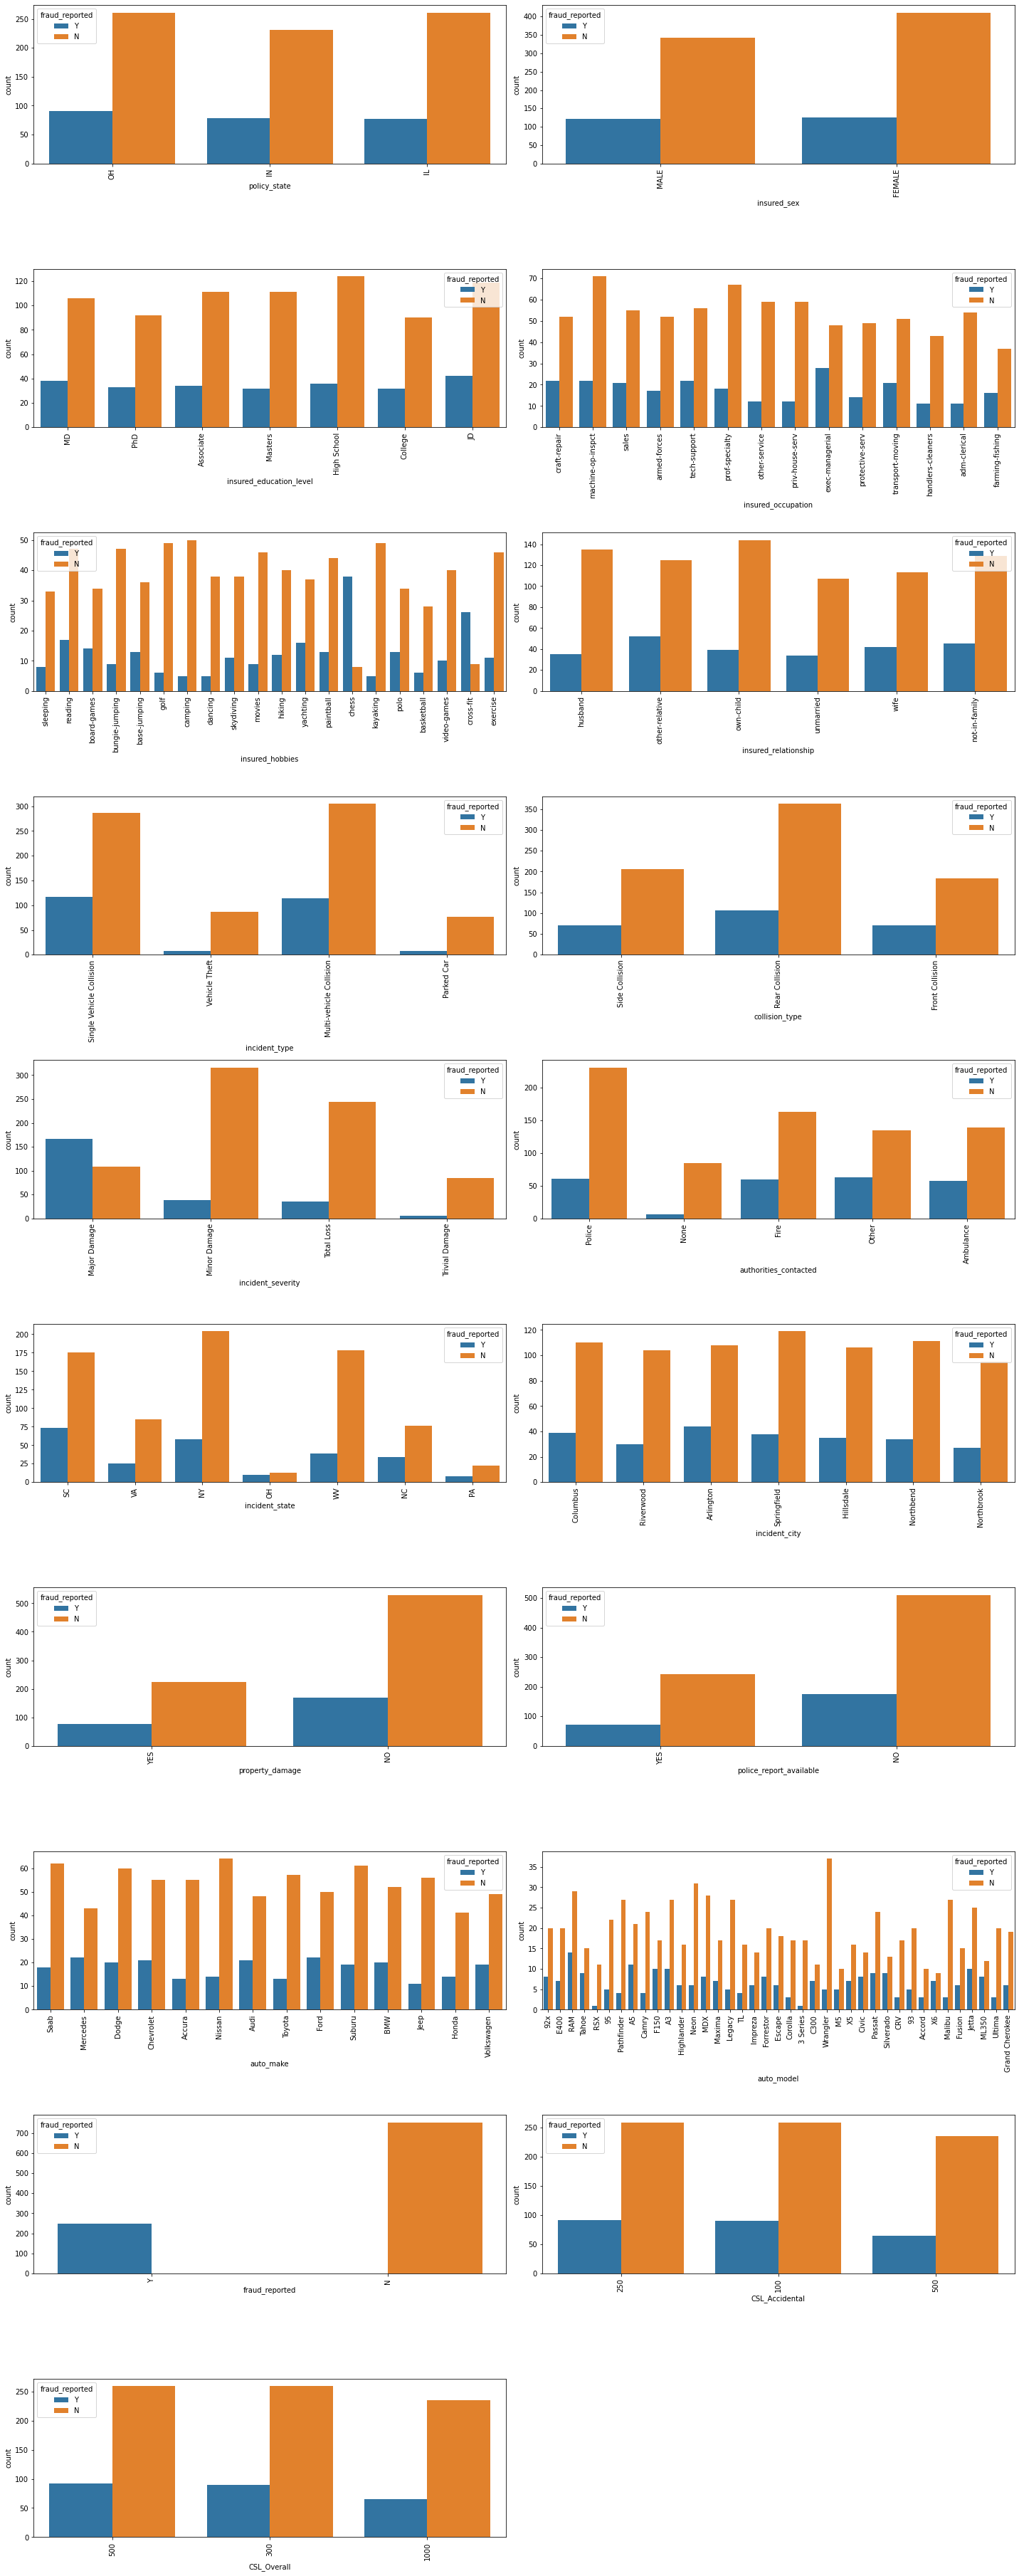

In [29]:
fig = plt.figure(figsize=(20, 60)) # bivariate analysis categorical and income column

# Loop through categorical columns and plot count plots
for i, col in enumerate(categorical_feature):
    plt.subplot(12, 2, i + 1)
    sns.countplot(data=df, x=col,hue=df['fraud_reported'])
    plt.xlabel(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [30]:
for i in categorical_feature:
    print(f'fraud_reported distribution by {i}')
    print(df.groupby(i)['fraud_reported'].value_counts())
    print('*'*50)

fraud_reported distribution by policy_state
policy_state  fraud_reported
IL            N                 261
              Y                  77
IN            N                 231
              Y                  79
OH            N                 261
              Y                  91
Name: fraud_reported, dtype: int64
**************************************************
fraud_reported distribution by insured_sex
insured_sex  fraud_reported
FEMALE       N                 411
             Y                 126
MALE         N                 342
             Y                 121
Name: fraud_reported, dtype: int64
**************************************************
fraud_reported distribution by insured_education_level
insured_education_level  fraud_reported
Associate                N                 111
                         Y                  34
College                  N                  90
                         Y                  32
High School              N                 12

#### Fraud Reported Distribution Summary

**Policy State**:
- IL and OH have a relatively higher percentage of fraud reported (Y) compared to IN.

**Insured Sex**:
- Both genders (FEMALE and MALE) have similar percentages of fraud reported (Y).

**Insured Education Level**:
- JD and MD holders have higher percentages of fraud reported (Y).

**Insured Occupation**:
- Exec-managerial and prof-specialty occupations have relatively higher percentages of fraud reported (Y).

**Insured Hobbies**:
- Skydiving and chess hobbies are associated with higher fraud reports.

**Insured Relationship**:
- All categories have some fraud reports, with husband having a slightly higher percentage.

**Incident Type**:
- Multi-vehicle Collision has a higher percentage of fraud reports compared to other incident types.

**Collision Type**:
- Rear Collision has a higher percentage of fraud reports compared to Front and Side Collisions.

**Incident Severity**:
- Major Damage and Minor Damage incidents have relatively higher percentages of fraud reported (Y).

**Authorities Contacted**:
- Police and Other contacts show higher percentages of fraud reports.

**Incident State**:
- SC and WV have relatively higher percentages of fraud reported (Y).

**Incident City**:
- Arlington and Columbus cities have higher percentages of fraud reported (Y).

**Property Damage**:
- Policies without property damage claims (NO) have higher fraud reports (Y).

**Police Report Available**:
- Policies without police reports (NO) have higher fraud reports (Y).

**Auto Make**:
- Audi, Mercedes, and Suburu have relatively higher percentages of fraud reports.

**Auto Model**:
- There are multiple auto models with varying percentages of fraud reports.

**Combined Single Limit (CSL) - Accidental and Overall**:
- CSLs with lower limits (100 and 250) have higher percentages of fraud reports (Y).

**Fraud Reported**:
- A summary of the overall fraud report distribution, with a majority being non-fraudulent (N).

Please note that these observations are based on the provided data and can be used as initial insights for further analysis or modeling.


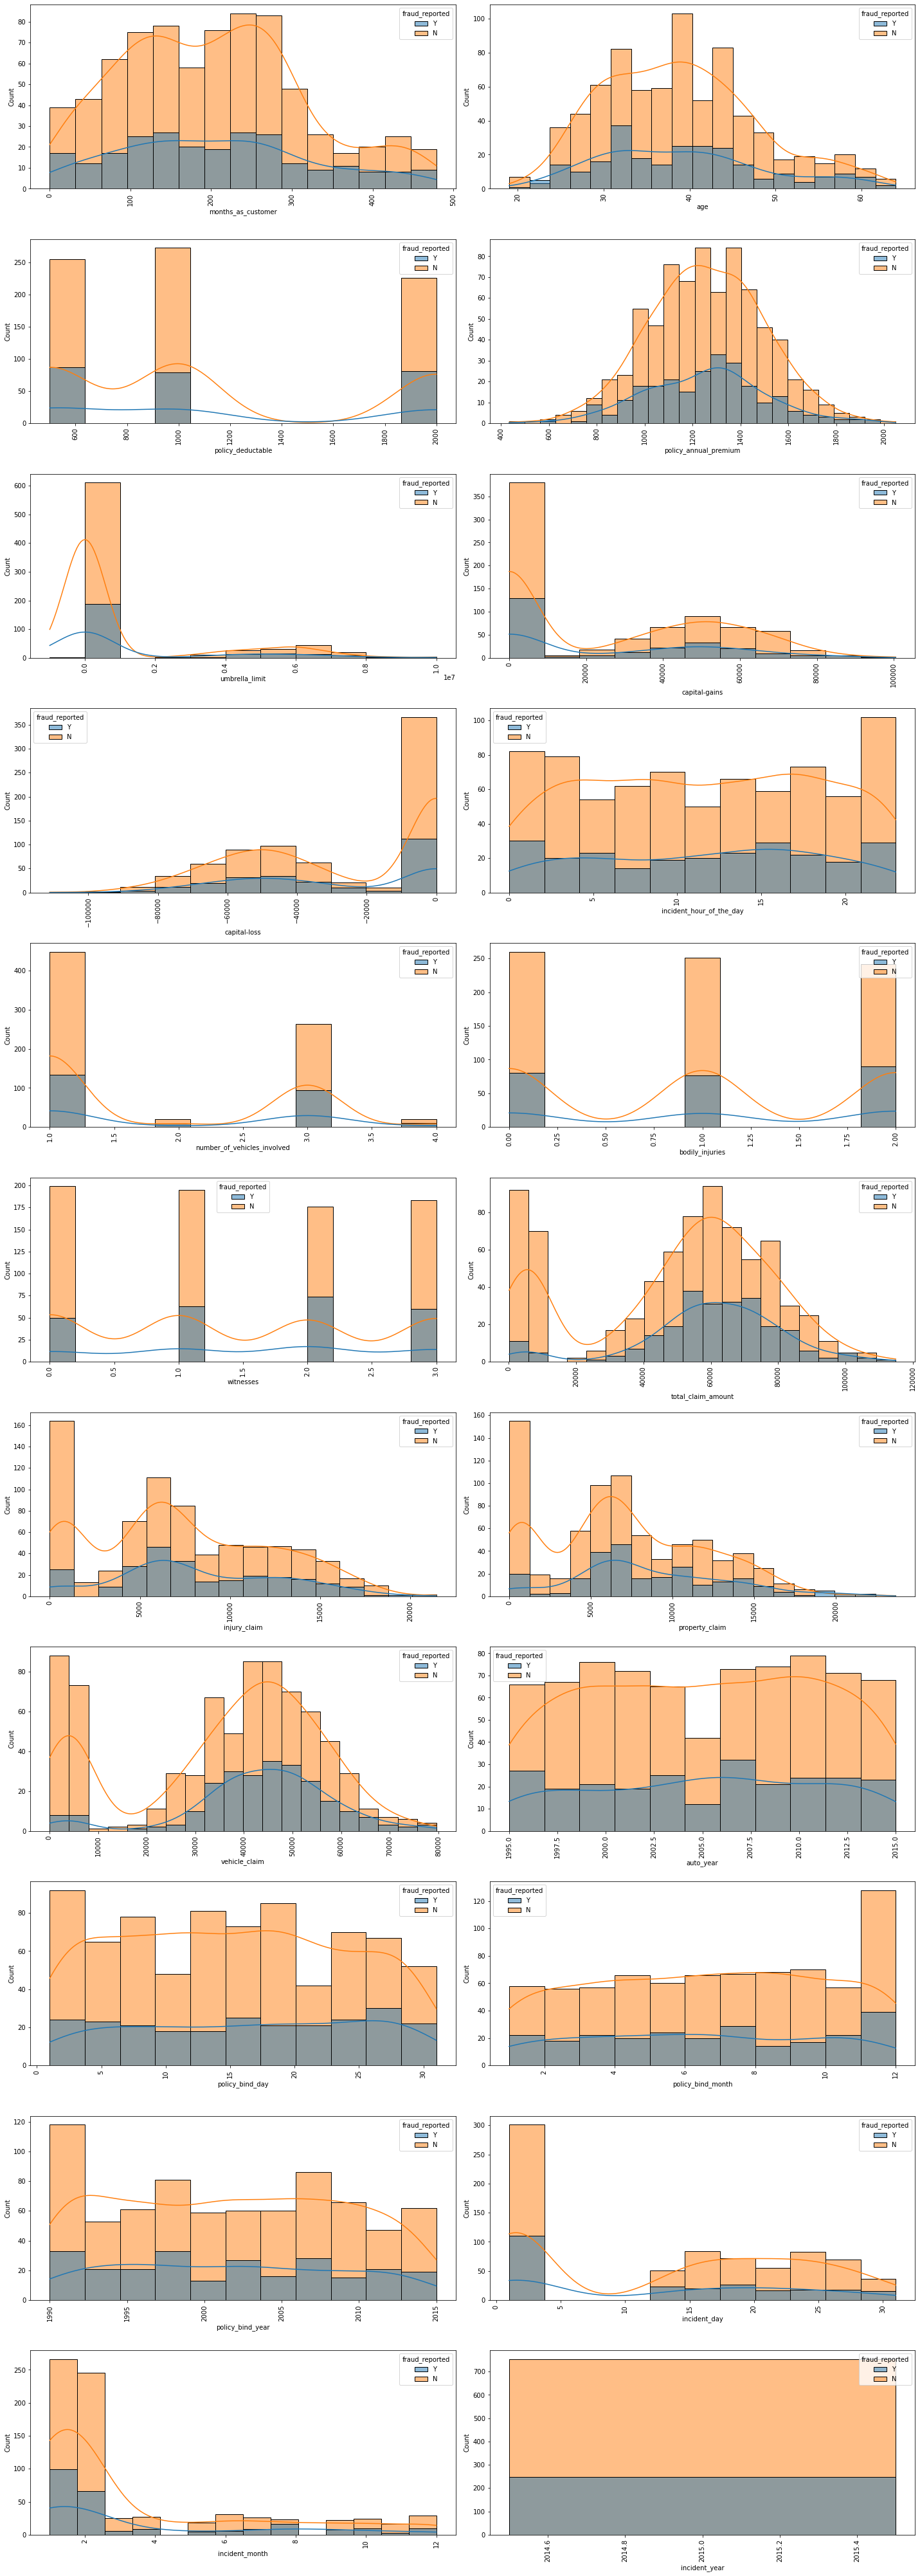

In [31]:
# Create the subplots
fig = plt.figure(figsize=(20, 60))


# Loop through numerical columns and plot count plots
for i, col in enumerate(numerical_feature):
    plt.subplot(12, 2, i + 1)
    sns.histplot(data=df, x=col,hue=df['fraud_reported'],kde=True)
    plt.xlabel(col)
    plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

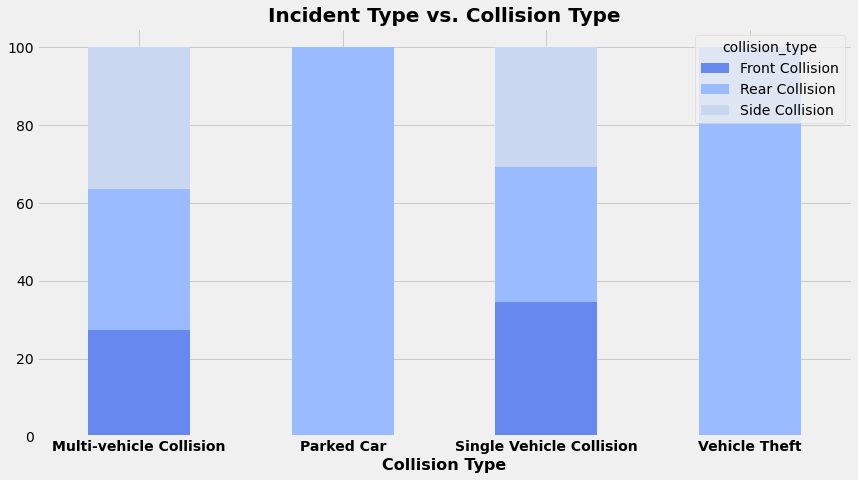

In [32]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 7)
sns.set_palette('coolwarm')

# Create a crosstab of 'incident_type' and 'collision_type'
cross_table = pd.crosstab(df['incident_type'], df['collision_type'])
percentage_table = cross_table.div(cross_table.sum(axis=1), axis=0) * 100
percentage_table.plot(kind='bar', stacked=True)
plt.title('Incident Type vs. Collision Type', fontsize=20, fontweight='bold')
plt.xlabel('Collision Type', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, rotation=0, fontweight='bold')

# Show the plot
plt.show()

In [33]:
cross_table = pd.crosstab(df['incident_type'], df['collision_type'])
percentage_table = cross_table.div(cross_table.sum(axis=1), axis=0) * 100
percentage_table

collision_type            Front Collision  Rear Collision  Side Collision
incident_type                                                            
Multi-vehicle Collision         27.446301       36.276850       36.276850
Parked Car                       0.000000      100.000000        0.000000
Single Vehicle Collision        34.491315       34.739454       30.769231
Vehicle Theft                    0.000000      100.000000        0.000000

#### Observations from Percentage Table of Incident Type vs. Collision Type

1. **Multi-vehicle Collision:**
   - Front Collision: Approximately 27.45% of multi-vehicle collisions involve front collisions.
   - Rear Collision: Approximately 36.28% of multi-vehicle collisions involve rear collisions.
   - Side Collision: Approximately 36.28% of multi-vehicle collisions involve side collisions.

2. **Parked Car:**
   - Rear Collision: In the case of parked cars, 100% of incidents involve rear collisions.
   - Front Collision and Side Collision: There are no recorded incidents of front or side collisions with parked cars.

3. **Single Vehicle Collision:**
   - Front Collision: Approximately 34.49% of single-vehicle collisions involve front collisions.
   - Rear Collision: Approximately 34.74% of single-vehicle collisions involve rear collisions.
   - Side Collision: Approximately 30.77% of single-vehicle collisions involve side collisions.

4. **Vehicle Theft:**
   - Rear Collision: In the case of vehicle theft, 100% of incidents involve rear collisions.
   - Front Collision and Side Collision: There are no recorded incidents of front or side collisions in vehicle theft cases.

These observations provide insights into the distribution of collision types for different incident types. For example, multi-vehicle collisions are relatively evenly distributed between front, rear, and side collisions, while parked cars are almost exclusively involved in rear collisions. Understanding these patterns can be valuable for risk assessment and claims processing in the insurance industry.


### Encoding categorical Feature

In [34]:
# Using Label Encoder on categorical variable
le = LabelEncoder()
for i in categorical_feature:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  ...  \
0                        4                   2               17  ...   
1                        4                   6               15  ...   
2                        6                  11                2  ...   
3                        6                   1                2  ...   
4                        0                  11                2  ...   

   auto_year  fraud_reported  policy_bind_day  policy_bind_month  \
0       2004               1               17                 10   
1       2007               1               27                  6   
2       2007               0                9                  6   
3       2014               1               25                  5   
4       2009               0                6                  6   

   policy_bind_year  incident_day  incident_month  incident_year  \
0              2014            25               1           2015   
1              2006            21               1           2015   
2              2000            22               2           2015   
3              1990             1              10           2015   
4              2014            17               2           2015   

   CSL_Accidental  CSL_Overall  
0               1            2  
1               1            2  
2               0            1  
3               1            2  
4               2            0  

[5 rows x 41 columns]

### Handling Outliers

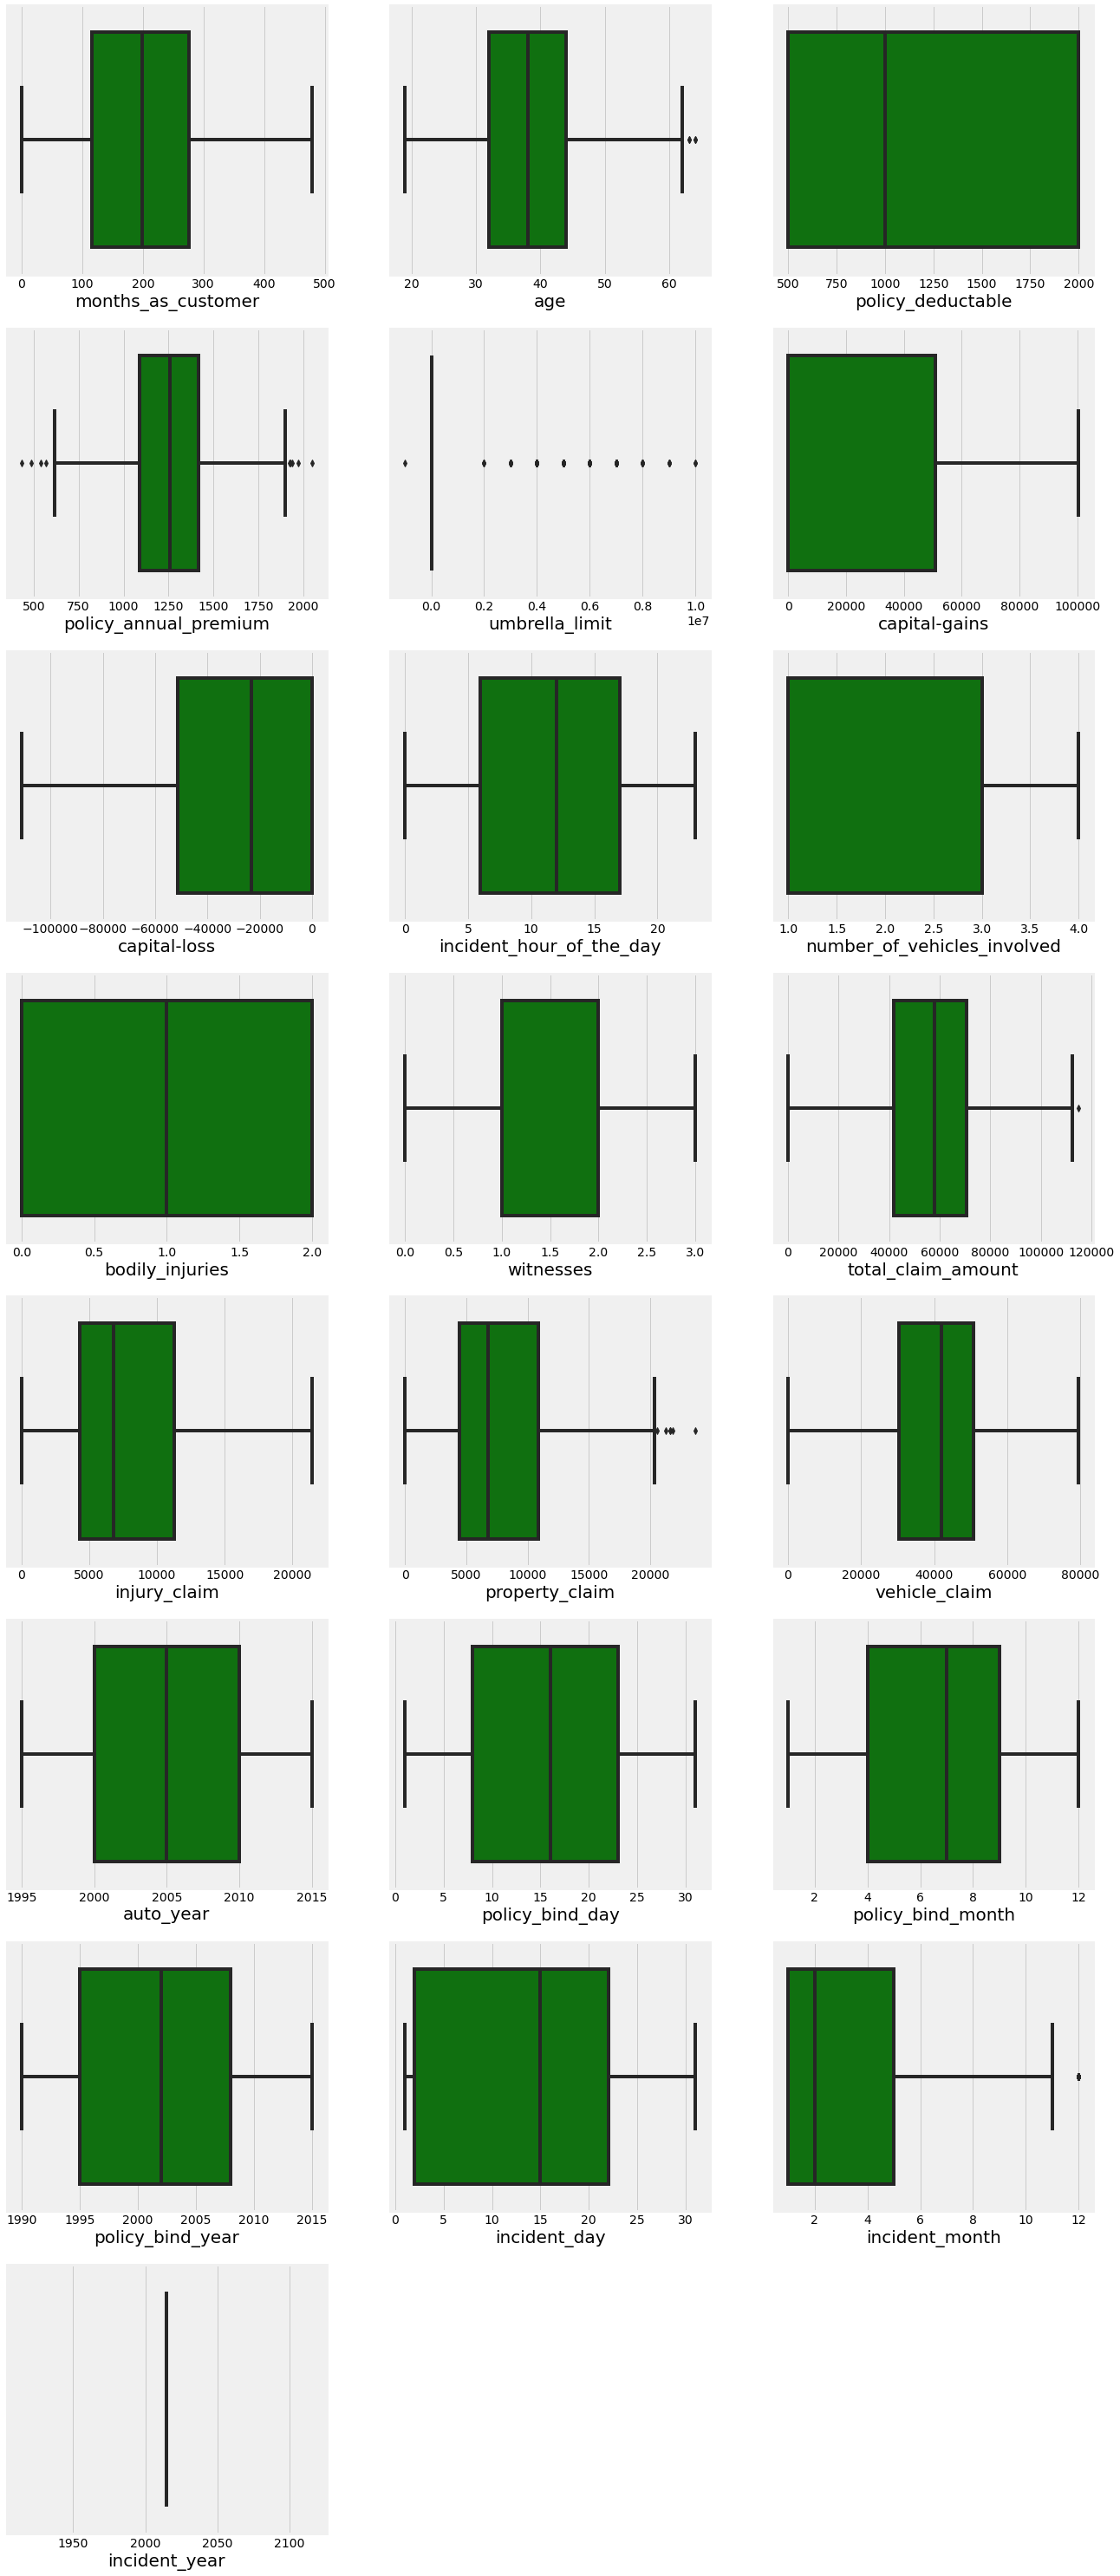

In [35]:
#checking outliers by boxplot
plt.figure(figsize=(20,50),facecolor='white')
plotnumber=1

for column in numerical_feature:
    if plotnumber<=22:
        ax=plt.subplot(8,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [36]:
df.shape

(1000, 41)

In [37]:
def remove_outliers_zscore(df, columns, z_threshold=3):
    for column in columns:       # Calculate Z-score for the column
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())   # Remove rows where Z-score exceeds the threshold 
        df = df.drop(df.index[z_scores > z_threshold])
    
    return df

In [38]:
df = remove_outliers_zscore(df,df.columns)
df

months_as_customer  age  policy_state  policy_deductable  \
0                   328   48             2               1000   
1                   228   42             1               2000   
2                   134   29             2               2000   
3                   256   41             0               2000   
4                   228   44             0               1000   
..                  ...  ...           ...                ...   
995                   3   38             2               1000   
996                 285   41             0               1000   
997                 130   34             2                500   
998                 458   62             0               2000   
999                 456   60             2               1000   

     policy_annual_premium  umbrella_limit  insured_sex  \
0                  1406.91               0            1   
1                  1197.22         5000000            1   
2                  1413.14         5000000            0   
3                  1415.74         6000000            0   
4                  1583.91         6000000            1   
..                     ...             ...          ...   
995                1310.80               0            0   
996                1436.79               0            0   
997                1383.49         3000000            0   
998                1356.92         5000000            1   
999                 766.19               0            0   

     insured_education_level  insured_occupation  insured_hobbies  ...  \
0                          4                   2               17  ...   
1                          4                   6               15  ...   
2                          6                  11                2  ...   
3                          6                   1                2  ...   
4                          0                  11                2  ...   
..                       ...                 ...              ...  ...   
995                        5                   2               13  ...   
996                        6                   9               17  ...   
997                        5                   1                3  ...   
998                        0                   5                0  ...   
999                        0                  11               11  ...   

     auto_year  fraud_reported  policy_bind_day  policy_bind_month  \
0         2004               1               17                 10   
1         2007               1               27                  6   
2         2007               0                9                  6   
3         2014               1               25                  5   
4         2009               0                6                  6   
..         ...             ...              ...                ...   
995       2006               0               16                  7   
996       2015               0                1                  5   
997       1996               0               17                  2   
998       1998               0               18                 11   
999       2007               0               11                 11   

     policy_bind_year  incident_day  incident_month  incident_year  \
0                2014            25               1           2015   
1                2006            21               1           2015   
2                2000            22               2           2015   
3                1990             1              10           2015   
4                2014            17               2           2015   
..                ...           ...             ...            ...   
995              1991            22               2           2015   
996              2014            24               1           2015   
997              2003            23               1           2015   
998              2011            26               2           2015   
999            

### Heat Map

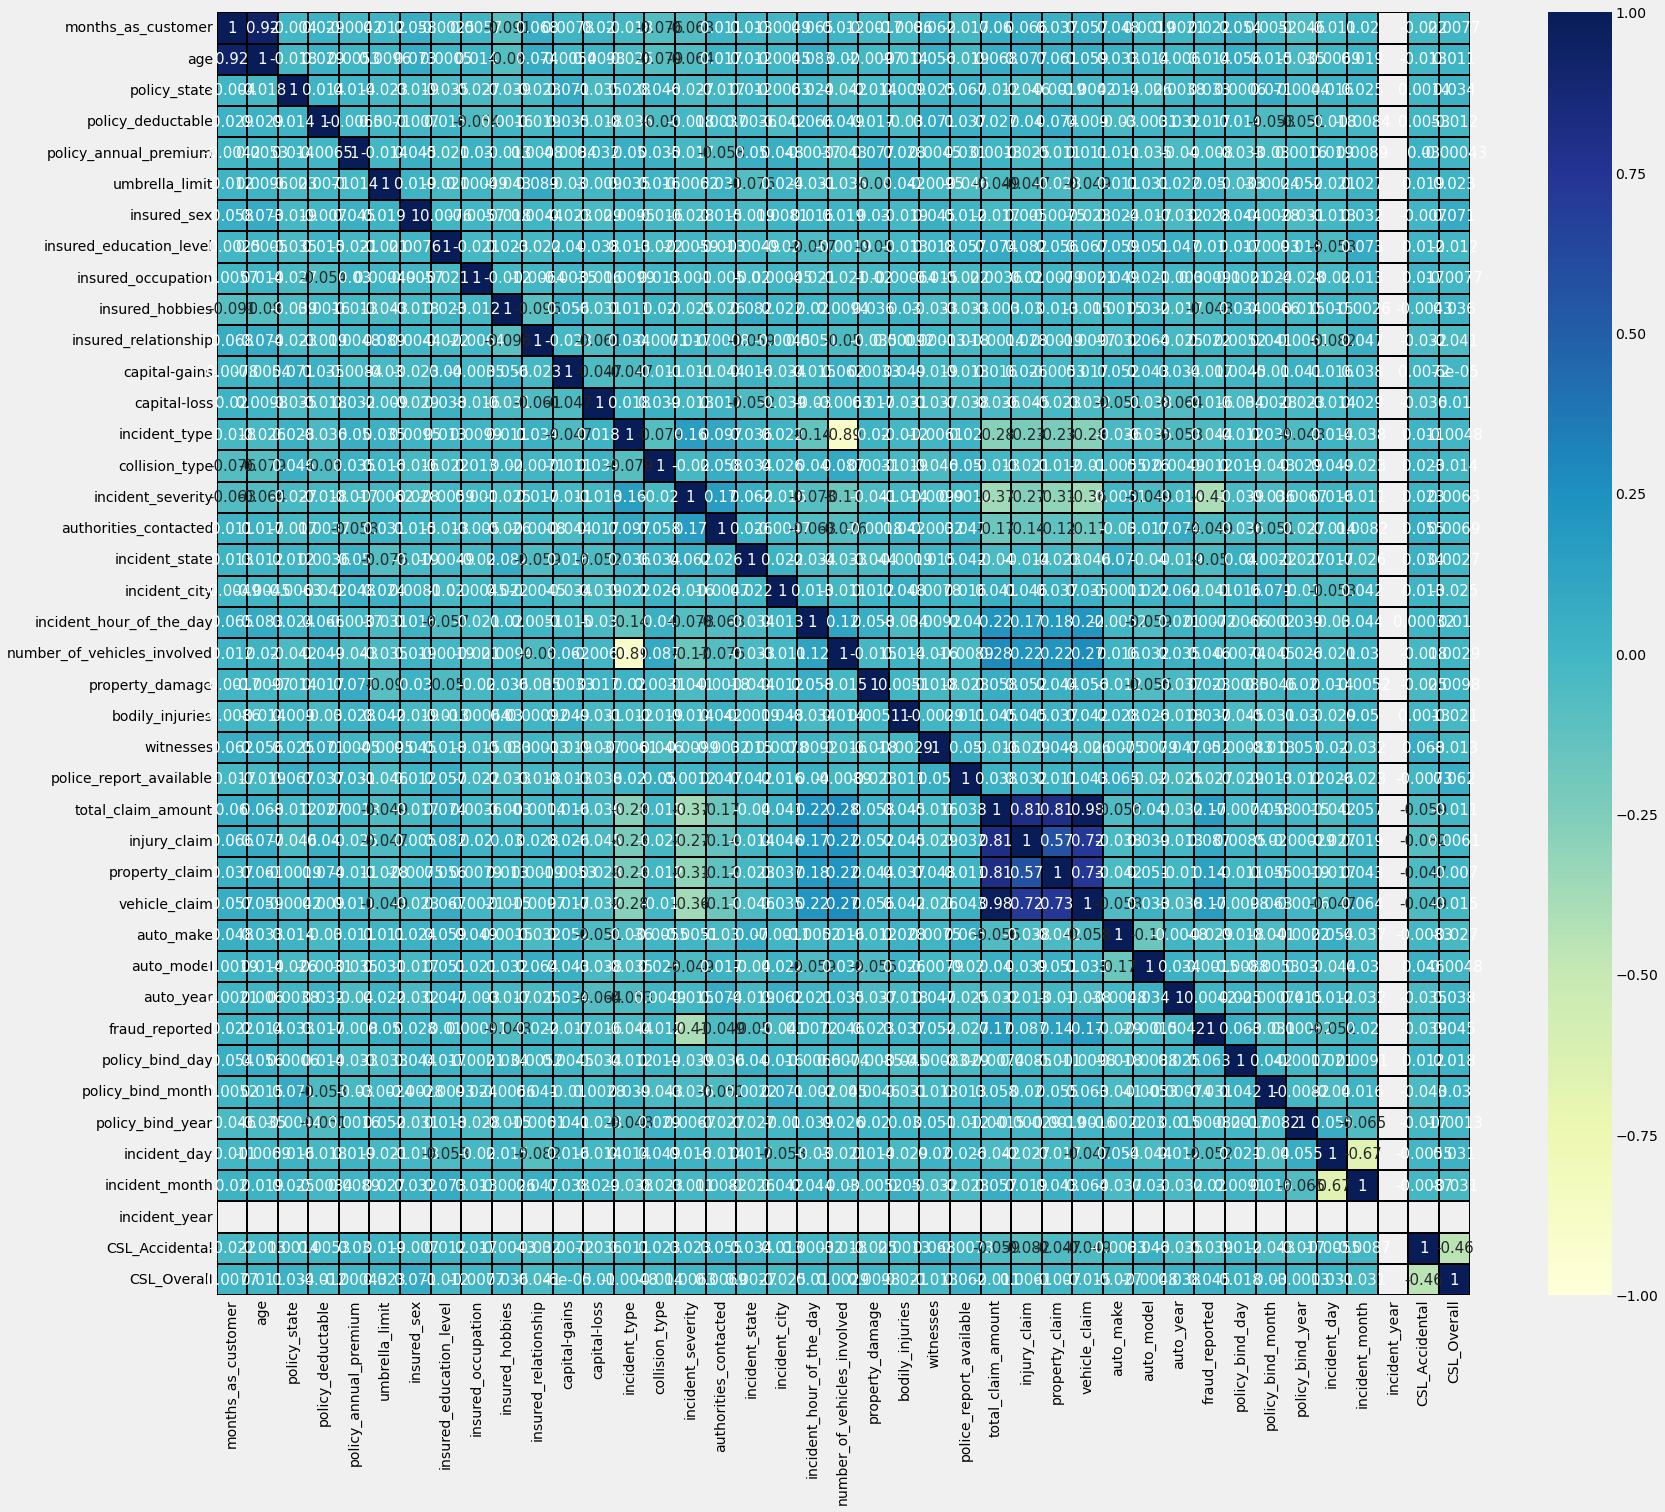

In [39]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor='black',annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

Observation:
    
some features are highly correlated with each other

### Checking Correlation with Target Column

In [40]:
#correlation with target column
correlation_with_quality = df.corr()['fraud_reported'].abs().sort_values(ascending=False)
print(correlation_with_quality)

fraud_reported                 1.000000
incident_severity              0.405677
vehicle_claim                  0.172333
total_claim_amount             0.165041
property_claim                 0.140973
injury_claim                   0.086910
policy_bind_day                0.062602
witnesses                      0.052155
incident_day                   0.051649
incident_state                 0.050457
umbrella_limit                 0.050356
authorities_contacted          0.048752
insured_hobbies                0.048072
number_of_vehicles_involved    0.045825
CSL_Overall                    0.045193
incident_type                  0.044068
incident_city                  0.041002
CSL_Accidental                 0.038599
bodily_injuries                0.036601
policy_state                   0.033416
policy_bind_month              0.030508
auto_make                      0.028546
insured_sex                    0.027622
police_report_available        0.026566
property_damage                0.022820


<AxesSubplot:>

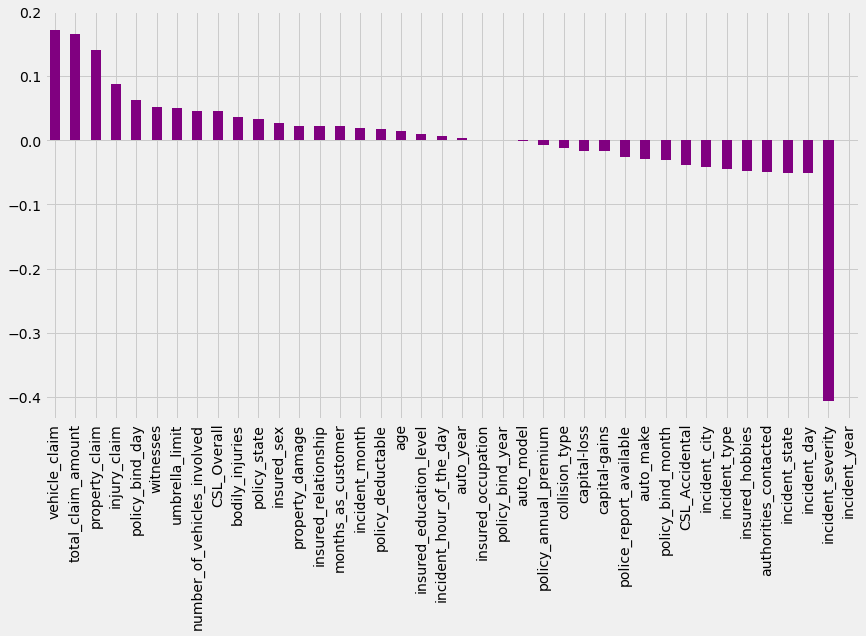

In [41]:
df.corr()['fraud_reported'].drop(['fraud_reported']).sort_values(ascending=False).plot(kind='bar', color='purple')

In [42]:
unnecessary_columns = ['incident_year','insured_occupation','auto_model','auto_year','policy_bind_year','incident_hour_of_the_day']

In [43]:
df.drop(unnecessary_columns,axis=1,inplace=True)

In [44]:
df.head(2)

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   

   insured_education_level  insured_hobbies  insured_relationship  ...  \
0                        4               17                     0  ...   
1                        4               15                     2  ...   

   property_claim  vehicle_claim  auto_make  fraud_reported  policy_bind_day  \
0           13020          52080         10               1               17   
1             780           3510          8               1               27   

   policy_bind_month  incident_day  incident_month  CSL_Accidental  \
0                 10            25               1               1   
1                  6            21               1               1   

   CSL_Overall  
0            2  
1            2  

[2 rows x 35 columns]

### Checking Correlation between columns to columns

In [45]:
#schecking correlation
df_corr = df.corr()
df_corr

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922654     -0.003979   
age                                    0.922654  1.000000     -0.018274   
policy_state                          -0.003979 -0.018274      1.000000   
policy_deductable                      0.029014  0.029268      0.014318   
policy_annual_premium                 -0.004210  0.005341      0.013918   
umbrella_limit                         0.012183  0.009622     -0.022568   
insured_sex                            0.057838  0.073431     -0.019320   
insured_education_level               -0.002547  0.000495     -0.034504   
insured_hobbies                       -0.091161 -0.079876     -0.038602   
insured_relationship                   0.067900  0.073960     -0.023188   
capital-gains                          0.007765 -0.005402      0.070839   
capital-loss                           0.019925  0.009817     -0.034865   
incident_type                         -0.017963 -0.026339      0.028102   
collision_type                        -0.075550 -0.079240      0.046220   
incident_severity                     -0.062922 -0.063932     -0.027324   
authorities_contacted                  0.011462  0.016564     -0.017344   
incident_state                         0.013142  0.011774      0.012345   
incident_city                         -0.004890 -0.004492     -0.006296   
number_of_vehicles_involved            0.011667  0.019582     -0.042126   
property_damage                       -0.001707 -0.009725     -0.013636   
bodily_injuries                       -0.008598 -0.014072      0.009009   
witnesses                              0.061634  0.055780      0.025044   
police_report_available               -0.016560 -0.018589      0.067348   
total_claim_amount                     0.060089  0.067852     -0.011764   
injury_claim                           0.066406  0.077340     -0.045613   
property_claim                         0.036649  0.061408     -0.001868   
vehicle_claim                          0.057476  0.059198     -0.004159   
auto_make                              0.048190  0.032650      0.013692   
fraud_reported                         0.021653  0.013763      0.033416   
policy_bind_day                        0.053967  0.055801      0.000604   
policy_bind_month                      0.005194  0.014836      0.070918   
incident_day                          -0.010862 -0.006944      0.016449   
incident_month                         0.019957  0.018927      0.024735   
CSL_Accidental                        -0.022346 -0.012761      0.001354   
CSL_Overall                            0.007718  0.010564      0.033511   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.029014              -0.004210   
age                                   0.029268               0.005341   
policy_state                          0.014318               0.013918   
policy_deductable                     1.000000              -0.006525   
policy_annual_premium                -0.006525               1.000000   
umbrella_limit                        0.007118              -0.014199   
insured_sex                          -0.007044               0.044626   
insured_education_level               0.015475              -0.021300   
insured_hobbies                       0.001570              -0.013264   
insured_relationship                 -0.018639               0.004761   
capital-gains                         0.034552              -0.008406   
capital-loss                         -0.018304               0.032158   
incident_type                        -0.035912               0.049727   
collision_type                       -0.050408               0.034586   
incident_severity                    -0.017625              -0.017383   
authorities_contacted                 0.003672              -0.058364   
incident_state                        0.003605               0.049563   
incident_city 

#### We are writing this function to see those columns which are highly correlated with each other

In [46]:
correlation_threshold = 0.80
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [47]:
features_to_drop

{'age',
 'injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'}

```i am not deleting age column```

In [48]:
df.drop(columns=['injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'],axis=1,inplace=True)

### VIF

In [49]:
df1=df.copy()

In [50]:
#drop target column
df1.drop('fraud_reported',axis=1, inplace=True)

In [51]:
#scaling data
sc=StandardScaler()
standard=sc.fit_transform(df1)

In [52]:
standard=pd.DataFrame(standard, columns=df1.columns)

In [53]:
VIF= pd.DataFrame()
VIF['features']= standard.columns
VIF['vif']=[variance_inflation_factor(standard.values,i) for i in range(len(standard.columns))]
VIF

features       vif
0        months_as_customer  6.812639
1                       age  6.817150
2              policy_state  1.033343
3         policy_deductable  1.023395
4     policy_annual_premium  1.032095
5            umbrella_limit  1.039606
6               insured_sex  1.025858
7   insured_education_level  1.033217
8           insured_hobbies  1.041411
9      insured_relationship  1.047384
10            capital-gains  1.030414
11             capital-loss  1.033659
12            incident_type  1.127549
13           collision_type  1.042552
14        incident_severity  1.193190
15    authorities_contacted  1.075613
16           incident_state  1.041353
17            incident_city  1.023707
18          property_damage  1.031781
19          bodily_injuries  1.023059
20                witnesses  1.025777
21  police_report_available  1.040106
22       total_claim_amount  1.295565
23                auto_make  1.041818
24          policy_bind_day  1.023561
25        policy_bind_month  1.035416
26             incident_day  1.839767
27           incident_month  1.841891
28           CSL_Accidental  1.300494
29              CSL_Overall  1.301527

###### There is no Multicollinearty we are good to go For Prediction

### Splitting into Feature and Target column

In [54]:
X= df.drop('fraud_reported', axis=1)
Y=df['fraud_reported']

#### removing Skewness

In [55]:
X.skew()

months_as_customer         0.364303
age                        0.478116
policy_state              -0.032200
policy_deductable          0.478464
policy_annual_premium      0.035686
umbrella_limit             1.776463
insured_sex                0.138189
insured_education_level    0.002485
insured_hobbies           -0.059031
insured_relationship       0.076198
capital-gains              0.470407
capital-loss              -0.384896
incident_type              0.093061
collision_type            -0.035588
incident_severity          0.281538
authorities_contacted     -0.120423
incident_state            -0.148839
incident_city              0.047091
property_damage            0.860557
bodily_injuries            0.005597
witnesses                  0.029226
police_report_available    0.803919
total_claim_amount        -0.593346
auto_make                 -0.026157
policy_bind_day            0.026616
policy_bind_month         -0.021949
incident_day               0.050882
incident_month             1

In [56]:
skew = ['umbrella_limit','property_damage','police_report_available','total_claim_amount','incident_month']

In [57]:
pt = PowerTransformer(method='yeo-johnson')

In [58]:
X[skew] = pt.fit_transform(X[skew])

### Standardization

In [59]:
sc=StandardScaler()

In [60]:
X=sc.fit_transform(X)

### Data Balancing

In [61]:
sm=SMOTE()

In [62]:
x,y=sm.fit_resample(X,Y)

In [63]:
x.shape , y.shape

((1490, 30), (1490,))

### Model Building

#### Find best Randomstate

In [64]:
maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  0.802013422818792 on Random State = 74


In [65]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=maxRS)

### Defining All Classification Models

In [66]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGD_model= SGDClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGD_model,ADA_model,GB_model ]

### Model training

In [67]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*30)

Accuracy_Score of  LogisticRegression() is 80.20134228187919
Confusion Matrix of  LogisticRegression()  is 
 [[127  29]
 [ 30 112]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       156
           1       0.79      0.79      0.79       142

    accuracy                           0.80       298
   macro avg       0.80      0.80      0.80       298
weighted avg       0.80      0.80      0.80       298

******************************
Accuracy_Score of  RidgeClassifier() is 80.20134228187919
Confusion Matrix of  RidgeClassifier()  is 
 [[126  30]
 [ 29 113]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       156
           1       0.79      0.80      0.79       142

    accuracy                           0.80       298
   macro avg       0.80      0.80      0.80       298
weighted avg       0.80      0.80      0.80       298

******************************
Accuracy_Score of  Decisio

#### CrossValidation

In [68]:
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 80.20134228187919
cross Validation accuracy score of  LogisticRegression()  is  74.09395973154362
**************************************************
Accuracy_Score of  RidgeClassifier() is 80.20134228187919
cross Validation accuracy score of  RidgeClassifier()  is  73.89261744966443
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 85.23489932885906
cross Validation accuracy score of  DecisionTreeClassifier()  is  83.48993288590604
**************************************************
Accuracy_Score of  SVC() is 86.57718120805369
cross Validation accuracy score of  SVC()  is  84.96644295302013
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 72.81879194630872
cross Validation accuracy score of  KNeighborsClassifier()  is  70.67114093959732
**************************************************
Accuracy_Score of  RandomForestClassifier() is 90.60402684563759

#### GradientBoostingClassifier gave best accuracy score and minimum difference for generalise model

#### Hyperparameter tuning on GradientBoostingClassifier

In [69]:
param_grid = {
    'n_estimators': [200, 600, 1000],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [3, 4, 5], 
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 4, 7]
}
param_grid

{'n_estimators': [200, 600, 1000],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [3, 4, 5],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 4, 7]}

In [70]:
grid_search=GridSearchCV(estimator=GB_model,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 4, 7],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 600, 1000]},
             verbose=2)

In [71]:
grid_search.best_estimator_

GradientBoostingClassifier(max_depth=5, max_features='sqrt',
                           min_samples_split=3, n_estimators=200)

In [72]:
GCV_pred=grid_search.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9228187919463087

#### RUC AOC Curve/Plot

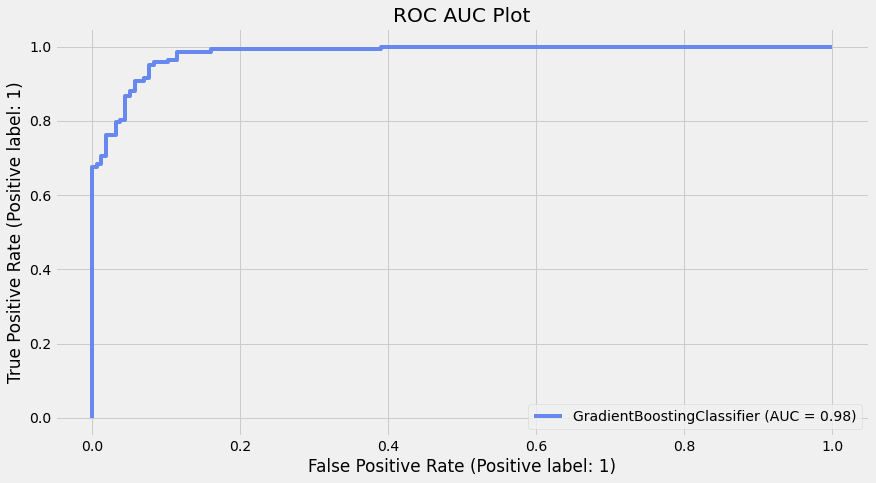

In [73]:
plot_roc_curve(grid_search.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

#### Confusion matrix

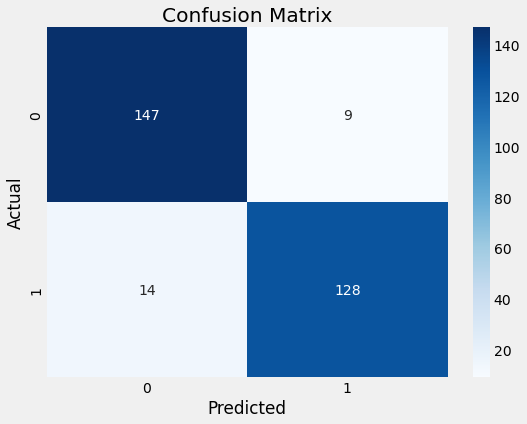

In [74]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
y_pred = grid_search.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Save Model

In [75]:
file_path = 'Insurance_Claim_Fraud.pkl'
with open(file_path, 'wb') as file:
    # Use the pickle.dump() method to save the object to the file
    pickle.dump(grid_search.best_estimator_, file)

##### Submitted By: Amit Kumar